<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/YF_Indian_Buy_Sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io

In [104]:
url = 'https://raw.githubusercontent.com/ramrajv/AI_Fin/main/YF_Stock_Codes.csv'
ndf = pd.read_csv(url)

In [105]:
ndf.head

<bound method NDFrame.head of          YF_Symbol       SC_NAME
0        500002.BO  ABB LTD.    
1        500003.BO  AEGIS LOGIS 
2        500008.BO  AMAR RAJA BA
3        500009.BO  A.SARABHAI  
4        500010.BO  HDFC        
...            ...           ...
6588       ZOTA.NS          ZOTA
6589      ZUARI.NS         ZUARI
6590   ZUARIIND.NS      ZUARIIND
6591  ZYDUSLIFE.NS     ZYDUSLIFE
6592  ZYDUSWELL.NS     ZYDUSWELL

[6593 rows x 2 columns]>

## Historical Market Prices

Get the historical market prices of 90days

In [106]:
end = datetime.date.today()
start = end-pd.Timedelta(days = 90)


In [107]:
Symbols = ndf['YF_Symbol'].tolist()

In [108]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:

    # print the symbol which is being downloaded
    # print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)

    try:
        # download the stock price
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)

        # append the individual stock prices
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

Streaming output truncated to the last 5000 lines.
1 Failed download:
ERROR:yfinance:['BALRAMCHI.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-07-14)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BANARBEAD.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')
<ipython-input-108-339dfe61493d>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_final = stock_final.append(stock,sort=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BANCOINDI.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-07-14)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BANDHANBN.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')
<ipython-input-108-339dfe61493d>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [109]:
# stock_final['Name'].unique()

In [110]:
stock_final.reset_index(inplace = True)
stock_final.set_index(pd.DatetimeIndex(stock_final['Date'].values))

,Date,Open,High,Low,Close,Adj Close,Volume,Name
2023-04-17,2023-04-17,225.100006,227.350006,222.350006,226.850006,226.850006,138225,500104.BO
2023-04-18,2023-04-18,227.000000,228.750000,227.000000,228.550003,228.550003,84307,500104.BO
2023-04-19,2023-04-19,227.300003,238.800003,227.300003,238.350006,238.350006,137241,500104.BO
2023-04-20,2023-04-20,240.000000,243.399994,237.850006,239.600006,239.600006,166033,500104.BO
2023-04-21,2023-04-21,240.699997,242.300003,238.699997,241.600006,241.600006,70783,500104.BO
...,...,...,...,...,...,...,...,...
2023-07-07,2023-07-07,1483.099976,1489.949951,1477.250000,1481.550049,1481.550049,13406,ZYDUSWELL.NS
2023-07-10,2023-07-10,1489.000000,1489.800049,1450.000000,1467.000000,1467.000000,28858,ZYDUSWELL.NS
2023-07-11,2023-07-11,1476.599976,1477.099976,1461.949951,1473.699951,1473.699951,15280,ZYDUSWELL.NS
2023-07-12,2023-07-12,1472.650024,1480.699951,1467.050049,1471.099976,1471.099976,21624,ZYDUSWELL.NS


In [111]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Calculate the simple moving average, standard deviation, upper band and the lower band
# Get the time period (20days)

period = 20

# calculate the Simple Moving Average (SMA)
stock_final['SMA'] = stock_final['Close'].rolling(window = period).mean()

# Get the Standard Deviation
stock_final['STD'] = stock_final['Close'].rolling(window = period).std()

# Calculate the upper Bolinger band
stock_final['Upper'] = stock_final['SMA'] + (stock_final['STD'] * 2)

# Calculate the lower Bolinger band
stock_final['Lower'] = stock_final['SMA'] - (stock_final['STD'] * 2)

# Create a list of columns to keep
cols = ['Close','SMA','Upper','Lower']

# plot the data
# stocks = stock_final['Name']
# for stock in stocks:
#     ndf = stock_final[stock_final['Name']==stock]
#     ndf[cols].plot(figsize = (15,8))
#     plt.title('Bollinger Band for '+stock)
#     plt.ylabel('INR')
#     plt.show()
#     break

In [144]:
stocks = stock_final['Name'].unique()
df = pd.DataFrame()

for stock in stocks:
    ndf = stock_final[stock_final['Name']==stock]
    df = pd.concat([df,ndf[period-1:]])

In [145]:
# df = df[period-1:]
df.loc[:,'Buy'] = df['Close']
df.loc[df['Close']>df['Lower'],'Buy'] = np.nan
df.loc[:,'Sell'] = df['Close']
df.loc[df['Close']<df['Upper'],'Sell'] = np.nan


In [146]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name,SMA,STD,Upper,Lower,Buy,Sell
19,2023-05-15,262.250000,267.399994,258.299988,259.549988,259.549988,256435,500104.BO,249.005002,9.852742,268.710486,229.299518,NaN,NaN
20,2023-05-16,262.299988,266.000000,259.149994,261.149994,261.149994,89317,500104.BO,250.720001,8.712624,268.145249,233.294753,NaN,NaN
21,2023-05-17,260.500000,264.100006,257.500000,258.200012,258.200012,102231,500104.BO,252.202502,7.118442,266.439386,237.965618,NaN,NaN
22,2023-05-18,256.649994,259.399994,253.600006,254.600006,254.600006,81284,500104.BO,253.015002,6.338792,265.692586,240.337418,NaN,NaN
23,2023-05-19,253.050003,256.950012,251.699997,256.350006,256.350006,95494,500104.BO,253.852502,5.527717,264.907935,242.797068,NaN,NaN


In [147]:
buy_stocks = df[
    (df['Date']==end) &
    (df['Buy'].notna())
][['Name','Close','Date']]
buy_stocks['action'] = 'Buy'

In [148]:
sell_stocks = df[
    (df['Date']==end) &
    (df['Sell'].notna())
][['Name','Close','Date']]
sell_stocks['action'] = 'Sell'

In [149]:
action_stocks = pd.concat([buy_stocks,sell_stocks])

In [150]:
action_stocks

,Name,Close,Date,action


In [151]:
ndf = df[df['Name']==stocks[0]]

In [152]:
ndf.head

<bound method NDFrame.head of          Date        Open        High         Low       Close   Adj Close  \
19 2023-05-15  262.250000  267.399994  258.299988  259.549988  259.549988   
20 2023-05-16  262.299988  266.000000  259.149994  261.149994  261.149994   
21 2023-05-17  260.500000  264.100006  257.500000  258.200012  258.200012   
22 2023-05-18  256.649994  259.399994  253.600006  254.600006  254.600006   
23 2023-05-19  253.050003  256.950012  251.699997  256.350006  256.350006   
24 2023-05-22  252.149994  256.250000  252.149994  255.399994  255.399994   
25 2023-05-23  255.000000  265.450012  255.000000  263.549988  263.549988   
26 2023-05-24  263.500000  264.750000  257.899994  258.149994  258.149994   
27 2023-05-25  258.149994  259.250000  254.800003  257.850006  257.850006   
28 2023-05-26  259.000000  261.649994  257.600006  258.250000  258.250000   
29 2023-05-30  257.100006  258.899994  255.449997  256.850006  256.850006   
30 2023-05-31  257.049988  264.000000  256.149

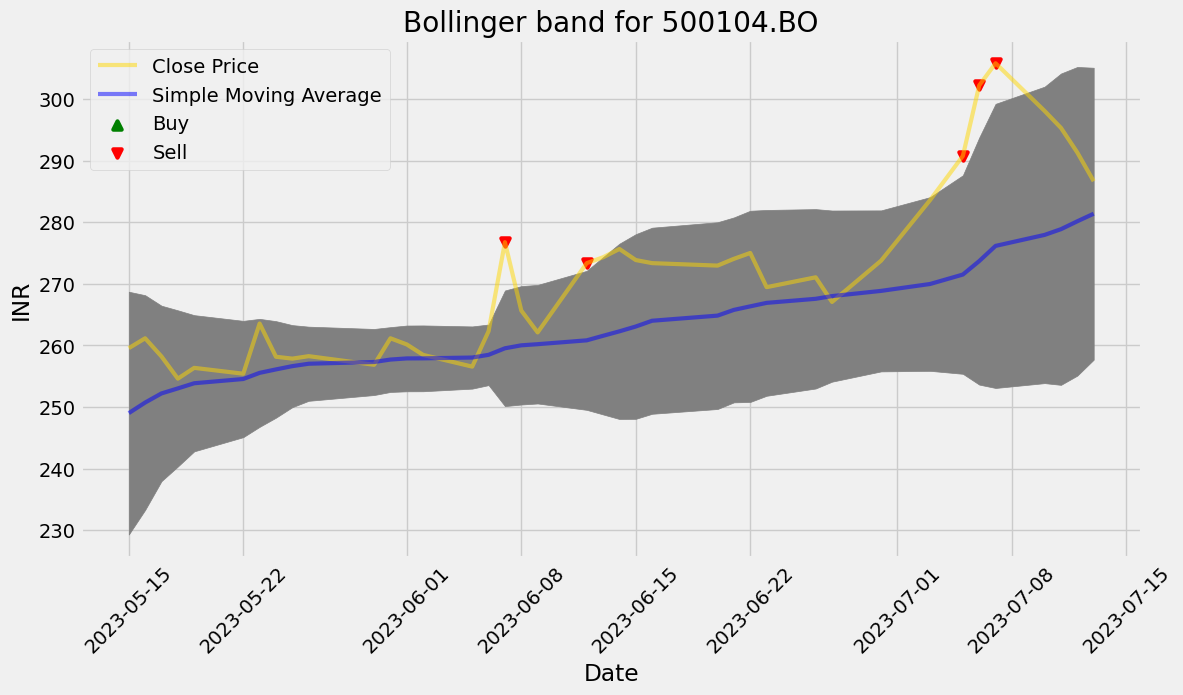

In [153]:
# Plot all of the data
# Ge the figure and the figure size
fig = plt.figure(figsize = (12.2, 6.4))
# Add the subplot
ax = fig.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = ndf['Date']
# Plot and shade the area betwen the upper band and the lower band grey
ax.fill_between(x_axis, ndf['Upper'], ndf['Lower'], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis, ndf['Close'], color = 'gold', lw = 3, label = 'Close Price', alpha = 0.5)
ax.plot(x_axis, ndf['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.5)
ax.scatter(x_axis, ndf['Buy'], color = 'green', lw = 3, label = 'Buy', marker = '^', alpha = 1)
ax.scatter(x_axis, ndf['Sell'], color = 'red', lw = 3, label = 'Sell',marker = 'v', alpha = 1)
# set the title and show the image
ax.set_title('Bollinger band for '+ndf['Name'].iloc[0])
ax.set_xlabel('Date')
ax.set_ylabel('INR')
plt.xticks(rotation = 45)
ax.legend()
plt.show()